In [ ]:
# Crie um novo ambiente virtual
!python -m venv myenv
!myenv\Scripts\activate
# Instale o TensorFlow no ambiente virtual
!pip install tensorflow
!pip install -U scikit-learn

In [41]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import Activation
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

In [10]:
df_ratings = pd.read_csv('data/corporateCreditRatingWithFinancialRatios.csv')
rating_order = ['AAA', 'AA+', 'AA', 'AA-', 'A+', 'A', 'A-', 'BBB+', 'BBB', 'BBB-', 
                'BB+', 'BB', 'BB-', 'B+', 'B', 'B-', 'CCC+', 'CCC', 'CCC-', 'CC', 'C', 'D']
df_filtered = df_ratings[df_ratings['Rating'].isin(rating_order)]


In [11]:
input_columns = ['Current Ratio', 'Long-term Debt / Capital', 'Debt/Equity Ratio',
                 'Gross Margin', 'Operating Margin', 'EBIT Margin', 'EBITDA Margin',
                 'Pre-Tax Profit Margin', 'Net Profit Margin', 'Asset Turnover',
                 'ROE - Return On Equity', 'Return On Tangible Equity',
                 'ROA - Return On Assets', 'ROI - Return On Investment',
                 'Operating Cash Flow Per Share', 'Free Cash Flow Per Share']

In [12]:
X = df_filtered[input_columns].copy()
encoder = OrdinalEncoder(categories=[rating_order])
y = encoder.fit_transform(df_filtered[['Rating']]).astype(int).flatten()

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),  # Primeira camada
    Dense(64, activation='tanh'),  # Nova camada adicionada
    Dense(64, activation='tanh'),  # 
    Dense(22, activation='softmax')  # Camada de saída
])
early_stopping = EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True)

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=500, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

y_predict = model.predict(X_test)
y_predict = np.argmax(y_predict, axis=1)

Epoch 1/500


c:\Users\berna\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


196/196 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.1165 - loss: 2.7626 - val_accuracy: 0.1614 - val_loss: 2.5513
Epoch 2/500
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1422 - loss: 2.5319 - val_accuracy: 0.1409 - val_loss: 2.5229
Epoch 3/500
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1568 - loss: 2.4809 - val_accuracy: 0.1640 - val_loss: 2.4572
Epoch 4/500
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1768 - loss: 2.4408 - val_accuracy: 0.1800 - val_loss: 2.4789
Epoch 5/500
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1777 - loss: 2.4264 - val_accuracy: 0.1775 - val_loss: 2.4367
Epoch 6/500
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1862 - loss: 2.3999 - val_accuracy: 0.1845 - val_loss: 2.4210
Epoch 7/500
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2047 - loss: 2.3651 - val_accuracy: 0.2018 - val_loss: 2.4012
Epoch 8/500
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2029 - loss: 2.3414 - val_accuracy: 0.1877

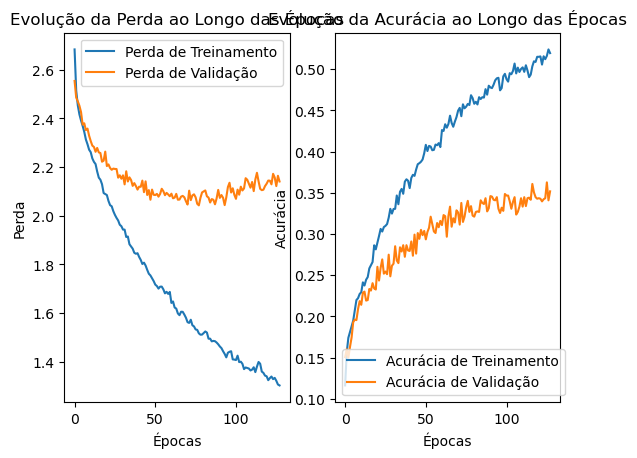

In [43]:
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Perda de Treinamento')
plt.plot(history.history['val_loss'], label='Perda de Validação')
plt.title('Evolução da Perda ao Longo das Épocas')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend()

# Gráfico da acurácia
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Acurácia de Treinamento')
plt.plot(history.history['val_accuracy'], label='Acurácia de Validação')
plt.title('Evolução da Acurácia ao Longo das Épocas')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()

plt.show()

In [47]:
y_predict = model.predict(X_test)

49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [26]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {accuracy:.4f}")

49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3583 - loss: 4.5382
Test accuracy: 0.3600


In [48]:
predictions = np.argmax(y_predict, axis=1)
actuals = y_test

# Decodificar os valores numéricos de volta para os rótulos originais
ratings = encoder.inverse_transform(predictions.reshape(-1, 1))
actual_ratings = encoder.inverse_transform(actuals.reshape(-1, 1))

# Criar um DataFrame com as previsões e os valores reais
df_comparison = pd.DataFrame({'Previsão': ratings.flatten(), 'Real': actual_ratings.flatten()})

# Mostrar até 100 registros
print(df_comparison.head(100))

   Previsão Real
0       AA-   A-
1         A   A+
2        A-   A-
3         A    A
4         A    A
..      ...  ...
95       B-   B-
96       A-   A-
97      BB+    B
98       B+  BB-
99       B+   A+

[100 rows x 2 columns]
